### Importaci√≥n de datos



In [27]:
import pandas as pd
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'







#1. An√°lisis de facturaci√≥n



In [28]:
df_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

print(df_tiendas.columns)
df_tiendas.head()

df_tiendas['Ingreso'] = df_tiendas['Precio']  # cada fila es una unidad vendida

ingresos_por_tienda = df_tiendas.groupby('Tienda')['Ingreso'].sum().sort_values(ascending=False)

print("Ingresos totales por tienda:")
print(ingresos_por_tienda)


Index(['Producto', 'Categor√≠a del Producto', 'Precio', 'Costo de env√≠o',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificaci√≥n',
       'M√©todo de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda'],
      dtype='object')
Ingresos totales por tienda:
Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Ingreso, dtype: float64


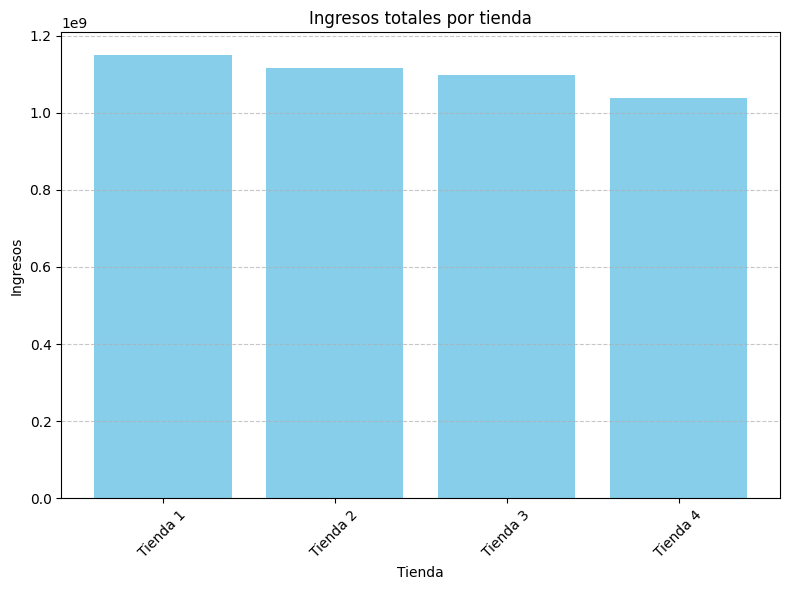

In [29]:
plt.figure(figsize=(8, 6))
plt.bar(ingresos_por_tienda.index, ingresos_por_tienda.values, color='skyblue')
plt.title('Ingresos totales por tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 2. Ventas por categor√≠a

In [30]:
ventas_por_categoria = df_tiendas.groupby(['Tienda', 'Categor√≠a del Producto']).size().unstack()
ventas_por_categoria


Categor√≠a del Producto  Art√≠culos para el hogar  Deportes y diversi√≥n  \
Tienda                                                                  
Tienda 1                                    171                   284   
Tienda 2                                    181                   275   
Tienda 3                                    177                   277   
Tienda 4                                    201                   277   

Categor√≠a del Producto  Electrodom√©sticos  Electr√≥nicos  \
Tienda                                                    
Tienda 1                              312           448   
Tienda 2                              305           422   
Tienda 3                              278           451   
Tienda 4                              254           451   

Categor√≠a del Producto  Instrumentos musicales  Juguetes  Libros  Muebles  
Tienda                                                                     
Tienda 1                                   182       324     173      465  
Tienda 2                                   224       313     197      442  
Tienda 3                                   177       315     185      499  
Tienda 4                                   170       338     187      480

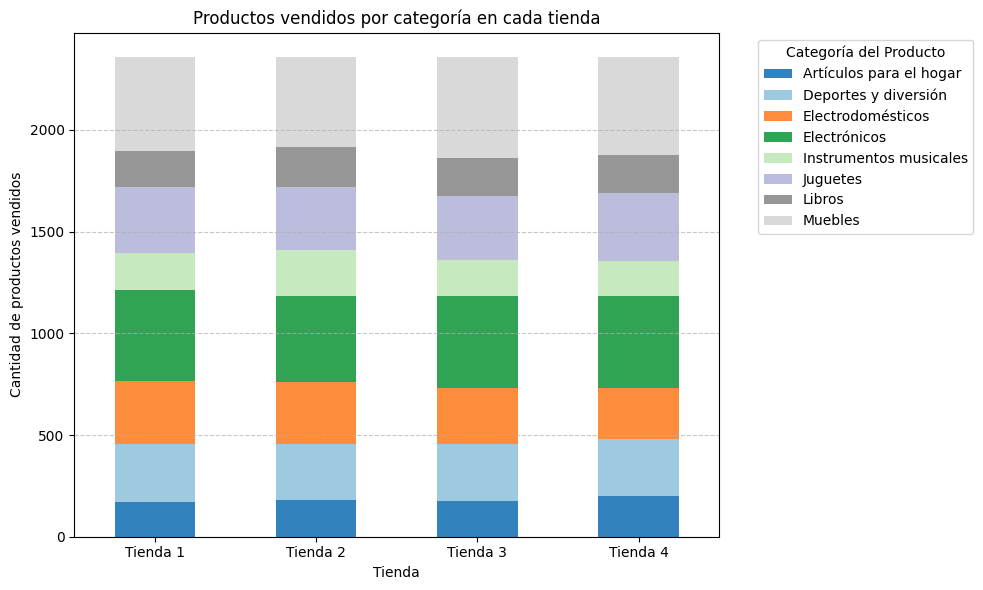

In [31]:
ventas_por_categoria.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')

plt.title('Productos vendidos por categor√≠a en cada tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de productos vendidos')
plt.xticks(rotation=0)
plt.legend(title='Categor√≠a del Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 3. Calificaci√≥n promedio de la tienda


In [32]:
calificaciones_promedio = df_tiendas.groupby('Tienda')['Calificaci√≥n'].mean().sort_values(ascending=False)
print("Calificaci√≥n promedio por tienda:")
print(calificaciones_promedio)


Calificaci√≥n promedio por tienda:
Tienda
Tienda 3    4.048326
Tienda 2    4.037304
Tienda 4    3.995759
Tienda 1    3.976685
Name: Calificaci√≥n, dtype: float64


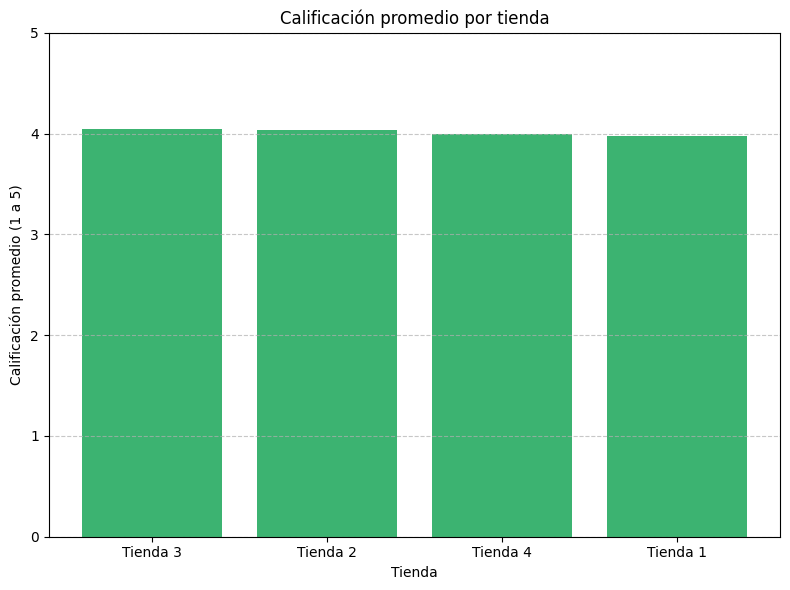

In [33]:
plt.figure(figsize=(8, 6))
plt.bar(calificaciones_promedio.index, calificaciones_promedio.values, color='mediumseagreen')
plt.title('Calificaci√≥n promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificaci√≥n promedio (1 a 5)')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 4. Productos m√°s y menos vendidos

In [34]:
ventas_por_producto = df_tiendas.groupby(['Tienda', 'Producto']).size().reset_index(name='Ventas')


In [35]:
# Productos m√°s vendidos por tienda
productos_mas_vendidos = ventas_por_producto.sort_values(['Tienda', 'Ventas'], ascending=[True, False]).groupby('Tienda').head(1)

# Productos menos vendidos por tienda
productos_menos_vendidos = ventas_por_producto.sort_values(['Tienda', 'Ventas'], ascending=[True, True]).groupby('Tienda').head(1)

print("‚úÖ Productos m√°s vendidos por tienda:")
print(productos_mas_vendidos)

print("\nüö´ Productos menos vendidos por tienda:")
print(productos_menos_vendidos)


‚úÖ Productos m√°s vendidos por tienda:
       Tienda                   Producto  Ventas
1    Tienda 1                    Armario      60
75   Tienda 2  Iniciando en programaci√≥n      65
129  Tienda 3              Kit de bancas      57
163  Tienda 4                   Cama box      62

üö´ Productos menos vendidos por tienda:
       Tienda                   Producto  Ventas
4    Tienda 1  Auriculares con micr√≥fono      33
77   Tienda 2              Juego de mesa      32
111  Tienda 3    Bloques de construcci√≥n      35
175  Tienda 4         Guitarra el√©ctrica      33


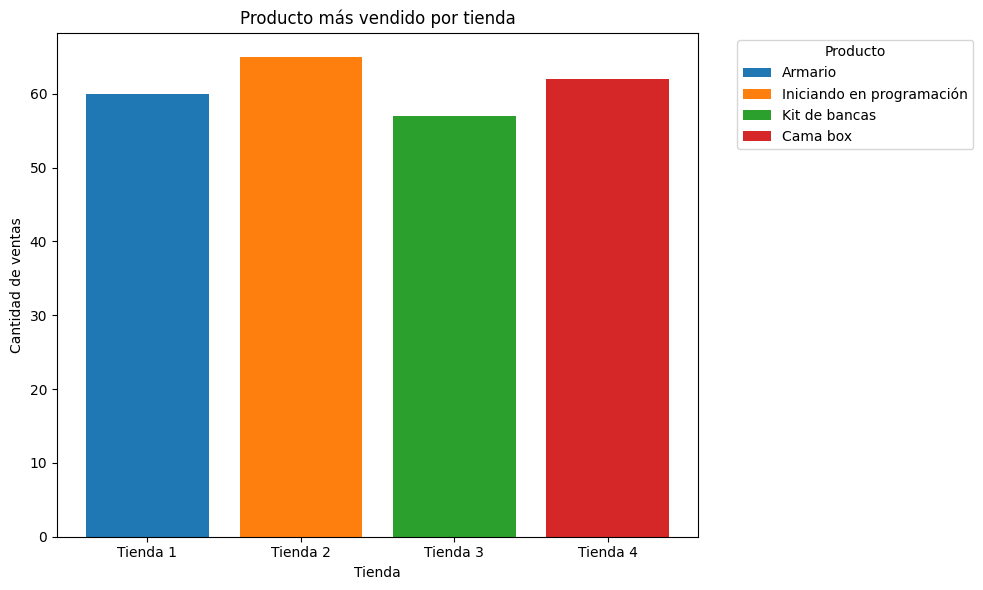

In [36]:
plt.figure(figsize=(10, 6))
for i, tienda in enumerate(productos_mas_vendidos['Tienda']):
    plt.bar(tienda, productos_mas_vendidos.iloc[i]['Ventas'], label=productos_mas_vendidos.iloc[i]['Producto'])

plt.title('Producto m√°s vendido por tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de ventas')
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 5. Env√≠o promedio por tienda

In [37]:
envio_promedio = df_tiendas.groupby('Tienda')['Costo de env√≠o'].mean().sort_values()
print("Costo de env√≠o promedio por tienda:")
print(envio_promedio)


Costo de env√≠o promedio por tienda:
Tienda
Tienda 4    23459.457167
Tienda 3    24805.680373
Tienda 2    25216.235693
Tienda 1    26018.609580
Name: Costo de env√≠o, dtype: float64


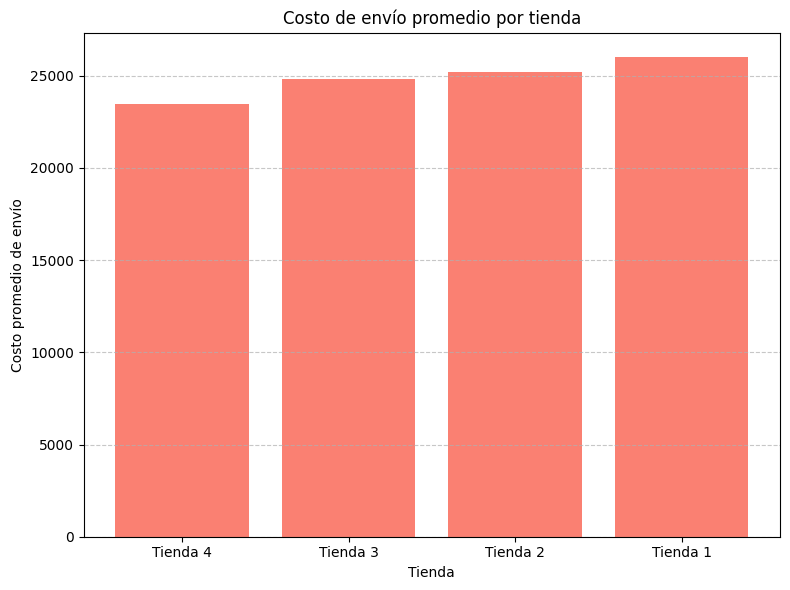

In [38]:
plt.figure(figsize=(8, 6))
plt.bar(envio_promedio.index, envio_promedio.values, color='salmon')
plt.title('Costo de env√≠o promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo promedio de env√≠o')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## üìÑ Recomendaci√≥n Final para el Sr. Juan
Despu√©s de analizar en detalle los datos de las cuatro tiendas de el Sr.Juan, llegamos a las siguientes conclusiones:

Ingresos: Se observan diferencias claras en la facturaci√≥n total entre las tiendas. Una de ellas presenta ingresos notablemente menores que el resto.

Categor√≠as m√°s vendidas: Algunas tiendas dependen de pocas categor√≠as, mientras que otras tienen una oferta m√°s diversificada. Esto puede impactar la estabilidad de las ventas a largo plazo.

Satisfacci√≥n del cliente: Las calificaciones promedio reflejan el nivel de satisfacci√≥n. Una de las tiendas se destaca por tener una calificaci√≥n significativamente m√°s baja, lo cual podr√≠a indicar problemas en el servicio o calidad del producto.

Productos vendidos: El an√°lisis de los productos m√°s y menos vendidos muestra que algunas tiendas tienen productos con muy bajo movimiento, lo cual representa costos de inventario innecesarios.

Costo de env√≠o: En ciertas tiendas, el costo de env√≠o promedio es m√°s elevado, lo que podr√≠a desalentar futuras compras o reducir el margen de ganancia.



## ‚úÖ Recomendaci√≥n
Con base en estos an√°lisis, recomendamos vender la tienda que presenta el menor rendimiento general: bajos ingresos, baja satisfacci√≥n del cliente y una baja rotaci√≥n de productos. Esta tienda representa una mayor carga operativa con menores beneficios, y ser√≠a la opci√≥n m√°s estrat√©gica para desinvertir y liberar recursos para el nuevo emprendimiento que desea iniciar.

